# 1) Delivery_time -> Predict delivery time using sorting time

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np


In [19]:
# Load the dataset
file_path = "C:/Users/Pritee/OneDrive/Documents/data science assignments/assignments/simple linear regression/delivery_time.csv"
df = pd.read_csv(file_path)

In [20]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [21]:
# Display the first few rows of the dataset
print(df.head())

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [22]:
# Check for any missing values
print(df.isnull().sum())

Delivery Time    0
Sorting Time     0
dtype: int64


In [23]:
# Extract features (X) and target variable (y)
X = df[['Delivery Time']]  # Feature
y = df['Sorting Time']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)


In [24]:
# Evaluate the model
r2_score = metrics.r2_score(y_test, y_pred)
adjusted_r2_score = 1 - (1-r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

# Display the evaluation metrics
print("R-squared Score:", r2_score)
print("Adjusted R-squared Score:", adjusted_r2_score)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared Score: 0.40411996047178333
Adjusted R-squared Score: 0.20549328062904448
Mean Absolute Error (MAE): 1.7173071781664517
Mean Squared Error (MSE): 4.29033628460316
Root Mean Squared Error (RMSE): 2.0713126959981585


In [31]:
# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})

# Display the entire DataFrame
print(result_df)

    Actual  Predicted  Difference
0       10   7.550498    2.449502
17       7   6.466098    0.533902
15       4   5.254122   -1.254122
1        4   4.736311   -0.736311
8       10   6.387301    3.612699


Text(0, 0.5, 'Predicted Values')

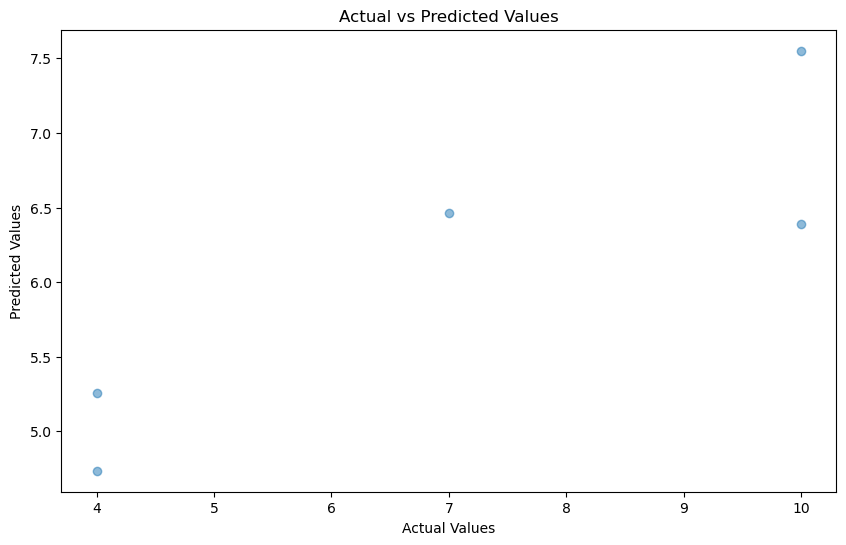

In [14]:
# Plot the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(result_df['Actual'], result_df['Predicted'], alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0.5, 1.0, 'Q-Q Plot')

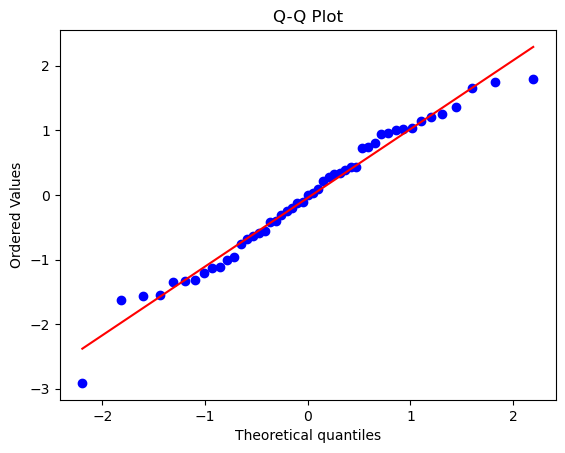

In [17]:
from scipy.stats import probplot

# Generate some random data
data = np.random.normal(size=49)

# Create a Q-Q plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')